# Project 1 - Write A Data Science Blog

## Key steps for the project

**1) Pick a Dataset**

* [Boston Airbnb Open Data](https://www.kaggle.com/airbnb/boston)

**2) Pose at least three questions related to business or real-world applications of how the data could be used.**

* [Q1)](#q1) Is there a big difference of price between the available and rented airbnb?
    * **Ans.:** There is no price information for the rented airbnb, just for the ones available.
* [Q2)](#q2) Which months have more rented airbnb? And the months that have less rented properties?
    * **Ans.:** The busiest months are Jan/Feb and Nov/Dec. When we evaluate the rented airbnb it is also possible to identify a peak in Sep/Oct. Curiously, there are fewer airbnb available in Sep/Oct.
* [Q3)](#q3) The price of the aribnb vary according to the month?
    * **Ans.:** Yes, and it is possible to observe there is an increase in the prices in April and after May it keeps increasing until August, however this data is not enough to predict if the same will happen in the next years because we just have data of some months from 2016 and 2017.
* [Q4)](#q4) Which factors impact in the airbnb prices?
    * **Ans.:** The neighborhood, the property type, and the room type impact the most in pricing.

**3) Create a Jupyter Notebook**
  
    3.1) Prepare data
    3.2) Analyze, model, and visualize
    
* This notebook contains the steps specified above detailed in the [table of content](#table).

**4) Communicate your business insights**

    4.1) Create a GitHub repository
    4.2) Create a blog post
    
<hr />
    
## Table of content <a class="anchor" id="table"></a>
* [1) Import libraries](#import-lib)
* [2) Read dataset](#read-dataset)
* [3) Exploratory data analysis](#eda)
    * [3.1) Listings](#listings)
    * [3.2) Calendar](#calendar)

## 1) Import libraries <a class="anchor" id="import-lib"></a>

In [1]:
import numpy as np
import pandas as pd
import collections #used to count frequency of elements in a list

#displays the output inline
%matplotlib inline

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#modeling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

## 2) Read the dataset <a class="anchor" id="read-dataset"></a>

This dataset consists of 3 tables:
- **Calendar:** including listing id and the price and availability for that day
- **Listings:** including full descriptions and average review score
- **Reviews:** including unique id for each reviewer and detailed comments

The Reviews table consists of text data. A sentiment analysis could be interesting to evaluate the comments of reviers. However, **we are going to focus only on table *Calendar* and *Listings*** to answer the business questions.

In [2]:
#Calendar, including listing id and the price and availability for that day
df_calendar = pd.read_csv("./dataset/calendar.csv")
df_calendar

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN
...,...,...,...,...
1308885,14504422,2016-09-10,f,NaN
1308886,14504422,2016-09-09,f,NaN
1308887,14504422,2016-09-08,f,NaN
1308888,14504422,2016-09-07,f,NaN


In [3]:
#Listings, including full descriptions and average review score
df_listings = pd.read_csv("./dataset/listings.csv")
df_listings

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,8373729,https://www.airbnb.com/rooms/8373729,20160906204935,2016-09-07,Big cozy room near T,5 min walking to Orange Line subway with 2 sto...,NaN,5 min walking to Orange Line subway with 2 sto...,none,NaN,...,9.0,f,NaN,NaN,t,strict,f,f,8,0.34
3581,14844274,https://www.airbnb.com/rooms/14844274,20160906204935,2016-09-07,BU Apartment DexterPark Bright room,"Most popular apartment in BU, best located in ...",Best location in BU,"Most popular apartment in BU, best located in ...",none,NaN,...,NaN,f,NaN,NaN,f,strict,f,f,2,NaN
3582,14585486,https://www.airbnb.com/rooms/14585486,20160906204935,2016-09-07,Gorgeous funky apartment,Funky little apartment close to public transpo...,Modern and relaxed space with many facilities ...,Funky little apartment close to public transpo...,none,"Cambridge is a short walk into Boston, and set...",...,NaN,f,NaN,NaN,f,flexible,f,f,1,NaN
3583,14603878,https://www.airbnb.com/rooms/14603878,20160906204935,2016-09-07,Great Location; Train and Restaurants,"My place is close to Taco Loco Mexican Grill, ...",NaN,"My place is close to Taco Loco Mexican Grill, ...",none,NaN,...,7.0,f,NaN,NaN,f,strict,f,f,1,2.00


In [4]:
print("df_listings.shape = ",df_listings.shape)
print("df_calendar.shape = ",df_calendar.shape)
df_join = pd.merge(df_listings, df_calendar, left_on="id", right_on = "listing_id")
print("df_join.shape = ",df_join.shape)

df_listings.shape =  (3585, 95)
df_calendar.shape =  (1308890, 4)
df_join.shape =  (1308890, 99)


In [5]:
df_join.dropna(subset=["price_y"], axis=0, inplace=True)
df_join[["price_x", "price_y"]]

,price_x,price_y
365,$65.00,$65.00
366,$65.00,$65.00
367,$65.00,$65.00
368,$65.00,$75.00
369,$65.00,$75.00
...,...,...
1308875,$65.00,$62.00
1308876,$65.00,$62.00
1308877,$65.00,$62.00
1308878,$65.00,$62.00


- The prices from df_calendar and df_listing are different from each other
- Due to the lack of documentation is hard to understand each price should be used in the predictions
- Because it might be interesting to considerate the availability time, we are going to use the price from df_calendar in our predictions and drop price_x

## 3) Exploratory Data Analysis <a class="anchor" id="eda"></a>

In [6]:
def df_dimensions(df):
    '''
    INPUT: Dataframe
    OUTPUT: Message - Number of the dataframe rows and columns
    '''
    num_rows = df.shape[0]
    num_cols = df.shape[1]
    print("The dataframe has {} rows and {} columns".format(num_rows, num_cols))
    
def cols_missing_values(df):
    '''
    INPUT: Dataframe
    OUTPUT: Message - Number of columns with missing data and the name of the columns
    '''
    no_nulls = set(df.columns[df.isnull().mean()==0])
    print("There are {} from {} columns with missing values".format(len(no_nulls), df.shape[1]))
    print("Columns with no missing values = ", no_nulls)

def most_missing_values(df, threshold):
    '''
    INPUT: Dataframe and threshold (set the percentage from 0 to 1 of how much data should be missing)
    OUTPUT: Message - Number and the name of the columns missing more than X percentage of data
    '''
    most_missing_cols = set(df.columns[df.isnull().mean()> threshold])
    print("There are {} from {} columns with  more than {}% of missing values".format(len(most_missing_cols), df.shape[1], threshold*100))
    print("Columns more than {}% of values missing = ".format(threshold*100))
    print(most_missing_cols)
    
def categorical_cols(df):
    '''
    INPUT: Dataframe
    OUTPUT: Message - Number of columns with categorical data and the name of the columns
    '''
    cat_cols = list(df.select_dtypes(include=["object"]).columns)
    print("There are {} from {} columns with categorical data".format(len(cat_cols), df.shape[1]))
    print("Columns categorical data = ", cat_cols)
    
def numerical_cols(df):
    '''
    INPUT: Dataframe
    OUTPUT: Message - Number of columns with numerical data and the name of the columns
    '''
    num_cols = list(df.select_dtypes(include=["float", "int"]).columns)
    print("There are {} from {} columns with numerical data".format(len(num_cols), df.shape[1]))
    print("Columns numerical data = ", num_cols)

### 3.1) Listings <a class="anchor" id="listings"></a>

In [7]:
df_dimensions(df_listings)

The dataframe has 3585 rows and 95 columns


In [8]:
cols_missing_values(df_listings)

There are 51 from 95 columns with missing values
Columns with no missing values =  {'minimum_nights', 'cancellation_policy', 'require_guest_profile_picture', 'guests_included', 'calculated_host_listings_count', 'neighbourhood_cleansed', 'host_verifications', 'availability_365', 'availability_60', 'host_name', 'experiences_offered', 'name', 'amenities', 'calendar_last_scraped', 'number_of_reviews', 'require_guest_phone_verification', 'description', 'state', 'host_has_profile_pic', 'requires_license', 'bed_type', 'host_identity_verified', 'listing_url', 'availability_90', 'picture_url', 'smart_location', 'latitude', 'host_id', 'is_location_exact', 'host_since', 'host_is_superhost', 'last_scraped', 'availability_30', 'street', 'id', 'host_picture_url', 'scrape_id', 'accommodates', 'host_thumbnail_url', 'longitude', 'maximum_nights', 'country', 'instant_bookable', 'host_total_listings_count', 'host_listings_count', 'calendar_updated', 'price', 'host_url', 'room_type', 'country_code', 'extr

In [9]:
most_missing_values(df_listings, .75)

There are 7 from 95 columns with  more than 75.0% of missing values
Columns more than 75.0% of values missing = 
{'square_feet', 'neighbourhood_group_cleansed', 'jurisdiction_names', 'has_availability', 'license', 'monthly_price', 'weekly_price'}


In [10]:
categorical_cols(df_listings)

There are 62 from 95 columns with categorical data
Columns categorical data =  ['listing_url', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'is_location_exact', 'property_type', 'room_type', 'bed_type', 'amenities', 'price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people', 'calendar_updated', 'calendar_last_scraped', 'first_review', 'last_review

In [11]:
numerical_cols(df_listings)

There are 33 from 95 columns with numerical data
Columns numerical data =  ['id', 'scrape_id', 'host_id', 'host_listings_count', 'host_total_listings_count', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'square_feet', 'guests_included', 'minimum_nights', 'maximum_nights', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'license', 'jurisdiction_names', 'calculated_host_listings_count', 'reviews_per_month']


In [12]:
df_listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,8.516813e-01,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


In [13]:
#Droping columns with missing data, text data, url, or without essential info
drop_cols = ['reviews_per_month','last_review','first_review','market','zipcode','city','neighbourhood_cleansed','host_neighbourhood','host_about','host_location','xl_picture_url','medium_url','thumbnail_url','house_rules','interaction','access','transit','notes','neighborhood_overview','space','summary','host_listings_count','country_code', 'host_url',  'last_scraped', 'calendar_updated', 'availability_365', 'listing_url', 'availability_30', 'experiences_offered', 'state', 'host_thumbnail_url', 'host_has_profile_pic', 'host_verifications', 'country', 'amenities', 'calculated_host_listings_count', 'require_guest_phone_verification', 'description', 'calendar_last_scraped', 'host_id', 'number_of_reviews', 'longitude', 'requires_license', 'host_name', 'picture_url', 'availability_90', 'host_picture_url', 'availability_60', 'latitude', 'name', 'guests_included', 'extra_people', 'scrape_id', 'host_total_listings_count','host_since', 'host_identity_verified', 'require_guest_profile_picture', 'smart_location', 'street', 'monthly_price', 'license', 'has_availability', 'neighbourhood_group_cleansed', 'square_feet', 'weekly_price', 'jurisdiction_names']
drop_cols = list(set(drop_cols)) #applying set to avoid any repetition
drop_cols
df_listings.drop(drop_cols, axis='columns',inplace=True)
print("Number of columns droped = ",len(list(df_listings.columns)))
print(df_listings.columns)

Number of columns droped =  28
Index(['id', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'neighbourhood',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price',
       'security_deposit', 'cleaning_fee', 'minimum_nights', 'maximum_nights',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy'],
      dtype='object')


In [14]:
#Treat columns
df_listings["price"] = df_listings["price"].apply(lambda x: float((x.replace("$", "")).replace(",","")) if not isinstance(x, float) else x)
df_listings["security_deposit"] = df_listings["security_deposit"].apply(lambda x: float((x.replace("$", "")).replace(",","")) if not isinstance(x, float) else x)
df_listings["cleaning_fee"] = df_listings["cleaning_fee"].apply(lambda x: float((x.replace("$", "")).replace(",","")) if not isinstance(x, float) else x)
df_listings["host_response_rate"] = df_listings["host_response_rate"].apply(lambda x: float(x.replace("%", "")) if not isinstance(x, float) else x)
df_listings["host_acceptance_rate"] = df_listings["host_acceptance_rate"].apply(lambda x: float(x.replace("%", "")) if not isinstance(x, float) else x)

In [15]:
categorical_cols(df_listings)

There are 9 from 28 columns with categorical data
Columns categorical data =  ['host_response_time', 'host_is_superhost', 'neighbourhood', 'is_location_exact', 'property_type', 'room_type', 'bed_type', 'instant_bookable', 'cancellation_policy']


In [16]:
numerical_cols(df_listings)

There are 19 from 28 columns with numerical data
Columns numerical data =  ['id', 'host_response_rate', 'host_acceptance_rate', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'security_deposit', 'cleaning_fee', 'minimum_nights', 'maximum_nights', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']


In [17]:
df_listings.describe()

,id,host_response_rate,host_acceptance_rate,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,3.585000e+03,3114.000000,3114.000000,3585.000000,3571.000000,3575.000000,3576.000000,3585.000000,1342.000000,2478.000000,3585.000000,3.585000e+03,2772.000000,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000
mean,8.440875e+06,94.989082,84.173089,3.041283,1.221647,1.255944,1.609060,173.925802,324.698212,68.380145,3.171269,2.872584e+04,91.916667,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234
std,4.500787e+06,12.517686,21.779254,1.778929,0.501487,0.753060,1.011745,148.331321,328.873075,51.297835,8.874133,1.670136e+06,9.531686,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116
min,3.353000e+03,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,10.000000,95.000000,5.000000,1.000000,1.000000e+00,20.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000
25%,4.679319e+06,97.000000,71.000000,2.000000,1.000000,1.000000,1.000000,85.000000,100.000000,25.000000,1.000000,3.650000e+02,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
50%,8.577620e+06,100.000000,94.000000,2.000000,1.000000,1.000000,1.000000,150.000000,250.000000,50.000000,2.000000,1.125000e+03,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000
75%,1.278953e+07,100.000000,100.000000,4.000000,1.000000,2.000000,2.000000,220.000000,450.000000,100.000000,3.000000,1.125000e+03,98.250000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,1.493346e+07,100.000000,100.000000,16.000000,6.000000,5.000000,16.000000,4000.000000,4500.000000,300.000000,300.000000,1.000000e+08,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


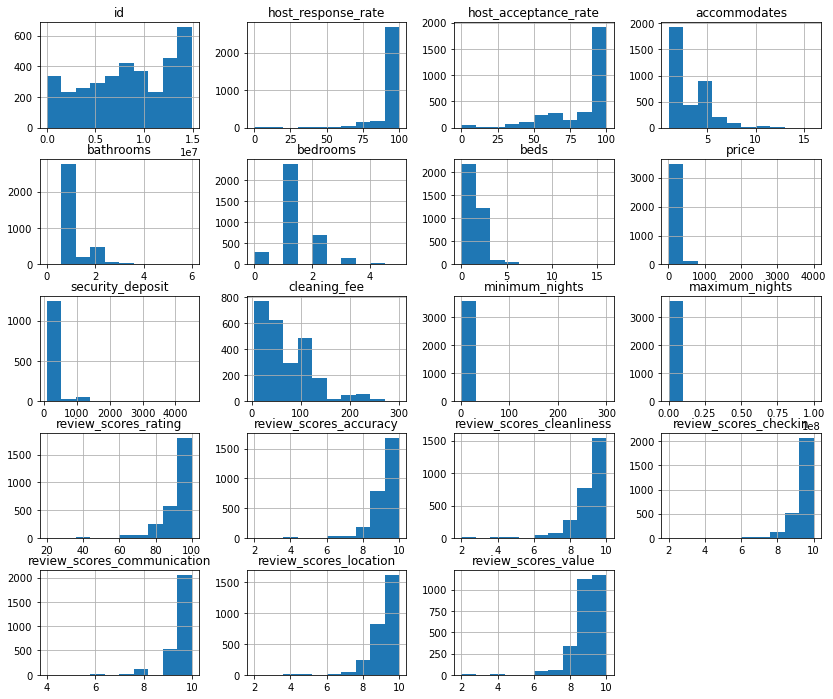

In [18]:
df_listings.hist(figsize = (14,12));

- Most of the airbnbs accomodate less than 5 people with usually 1 bathroom, 1 or 2 bedrooms, and 1 or 2 beds;
- The review scores histograms are righ skewed distribution, what means that most of accomodations are highly evaluated;
- The prices are usually less than 1 thousand dollars;
- Although the cleaning fee tends to be cheap, its distribution varies.

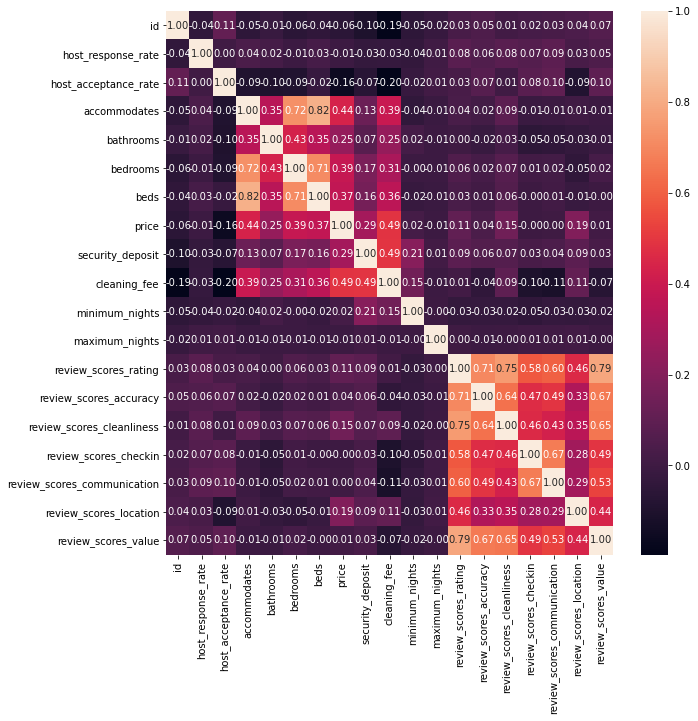

In [19]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df_listings.corr(), annot=True, fmt=".2f")

- The cleaning_fee, security_deposit, and the review_scroes are the variables that most correlates with the price.

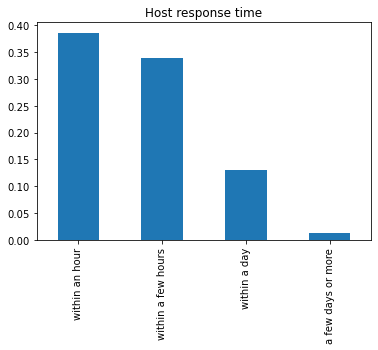

In [20]:
host_response_time = df_listings.host_response_time.value_counts()
(host_response_time/df_listings.shape[0]).plot(kind="bar");
plt.title("Host response time");

- The hosts usually answer the clients quickly, probably to finish the negociation as soon as possible.

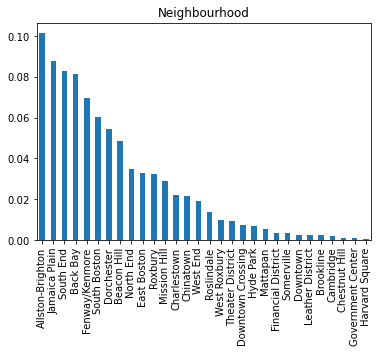

In [21]:
neighbourhood = df_listings.neighbourhood.value_counts()
(neighbourhood/df_listings.shape[0]).plot(kind="bar");
plt.title("Neighbourhood");

- Aliston-Brighton, Jamaica Plain, and South End are the neighbourhoods with the highest number of accomodations.

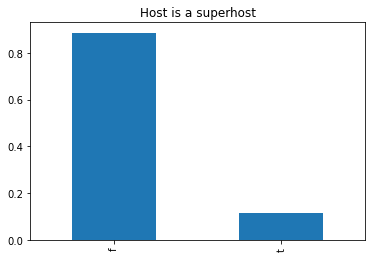

In [22]:
host_is_superhost = df_listings.host_is_superhost.value_counts()
(host_is_superhost/df_listings.shape[0]).plot(kind="bar");
plt.title("Host is a superhost");

- More than 80% of the hosts are not a superhost.

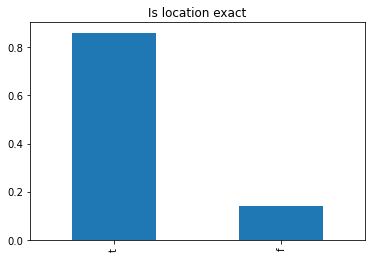

In [23]:
is_location_exact = df_listings.is_location_exact.value_counts()
(is_location_exact/df_listings.shape[0]).plot(kind="bar");
plt.title("Is location exact");

- Most of the location info available are exact!

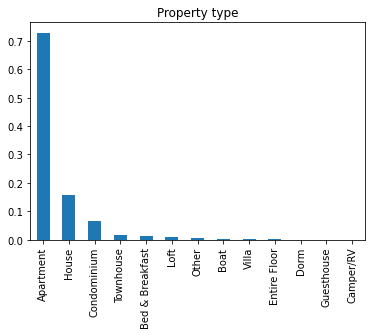

In [24]:
property_type = df_listings.property_type.value_counts()
(property_type/df_listings.shape[0]).plot(kind="bar");
plt.title("Property type");

- More than 70% of the property avaiable in airbnb are apartments.

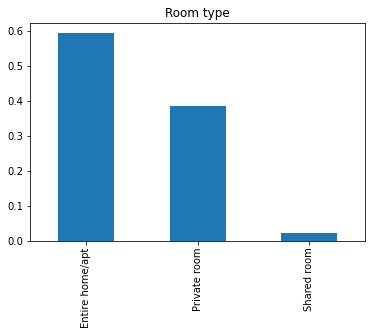

In [25]:
room_type = df_listings.room_type.value_counts()
(room_type/df_listings.shape[0]).plot(kind="bar");
plt.title("Room type");

- Less than 1% of the rooms are shared.

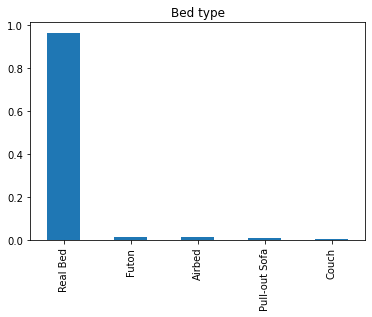

In [26]:
bed_type = df_listings.bed_type.value_counts()
(bed_type/df_listings.shape[0]).plot(kind="bar");
plt.title("Bed type");

- The clients should not be worried because there is almost a 100% chance they are going to sleep in a real bed :)

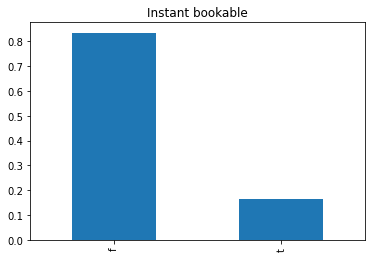

In [27]:
instant_bookable = df_listings.instant_bookable.value_counts()
(instant_bookable/df_listings.shape[0]).plot(kind="bar");
plt.title("Instant bookable");

- Booking an airbnb is usually not instantaneous.

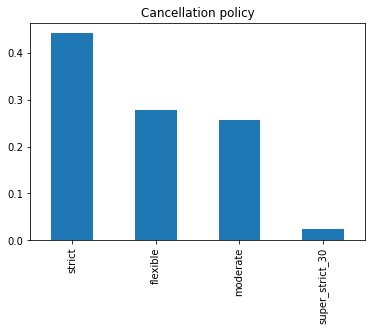

In [28]:
cancellation_policy = df_listings.cancellation_policy.value_counts()
(cancellation_policy/df_listings.shape[0]).plot(kind="bar");
plt.title("Cancellation policy");

In [29]:
cols_missing_values(df_listings)

There are 11 from 28 columns with missing values
Columns with no missing values =  {'maximum_nights', 'host_is_superhost', 'bed_type', 'minimum_nights', 'instant_bookable', 'cancellation_policy', 'price', 'room_type', 'is_location_exact', 'id', 'accommodates'}


### 3.2) Calendar <a class="anchor" id="calendar"></a>

In [30]:
df_dimensions(df_calendar)

The dataframe has 1308890 rows and 4 columns


In [31]:
cols_missing_values(df_calendar)

There are 3 from 4 columns with missing values
Columns with no missing values =  {'available', 'date', 'listing_id'}


In [32]:
most_missing_values(df_calendar, .75)

There are 0 from 4 columns with  more than 75.0% of missing values
Columns more than 75.0% of values missing = 
set()


In [33]:
categorical_cols(df_calendar)

There are 3 from 4 columns with categorical data
Columns categorical data =  ['date', 'available', 'price']


In [34]:
numerical_cols(df_calendar)

There are 1 from 4 columns with numerical data
Columns numerical data =  ['listing_id']


In [35]:
df_calendar.describe()

,listing_id
count,1.308890e+06
mean,8.442118e+06
std,4.500149e+06
min,3.353000e+03
25%,4.679319e+06
50%,8.578710e+06
75%,1.279603e+07
max,1.493346e+07


In [36]:
df_calendar["available"].value_counts()

f    665853
t    643037
Name: available, dtype: int64

In [37]:
df_calendar["price"].value_counts()

$150.00      20752
$65.00       17518
$75.00       16249
$100.00      15499
$200.00      14326
             ...  
$1,875.00        1
$1,621.00        1
$1,695.00        1
$1,924.00        1
$1,017.00        1
Name: price, Length: 1246, dtype: int64

In [38]:
df_calendar["date"].value_counts()

2017-09-05    3586
2017-05-30    3586
2017-06-01    3586
2017-06-02    3586
2017-06-03    3586
              ... 
2016-11-23    3586
2016-11-24    3586
2016-11-25    3586
2016-11-26    3586
2016-09-06    3586
Name: date, Length: 365, dtype: int64

In [39]:
#Convert date to columns month_calendar and year_calendar
df_calendar["year_calendar"] = df_calendar["date"].apply(lambda x: int(x[:4]))
df_calendar["month_calendar"] = df_calendar["date"].apply(lambda x: int(x[5:7]))
df_calendar.drop(columns="date", inplace=True)
df_calendar.head()

,listing_id,available,price,year_calendar,month_calendar
0,12147973,f,NaN,2017,9
1,12147973,f,NaN,2017,9
2,12147973,f,NaN,2017,9
3,12147973,f,NaN,2017,9
4,12147973,f,NaN,2017,9


In [40]:
#Convert price to float
df_calendar["price"] = df_calendar["price"].apply(lambda x: float((x.replace("$", "")).replace(",","")) if not isinstance(x, float) else x)

In [41]:
df_calendar.describe()

,listing_id,price,year_calendar,month_calendar
count,1.308890e+06,643037.000000,1.308890e+06,1.308890e+06
mean,8.442118e+06,198.438909,2.016679e+03,6.526027e+00
std,4.500149e+06,180.142913,4.666874e-01,3.447853e+00
min,3.353000e+03,11.000000,2.016000e+03,1.000000e+00
25%,4.679319e+06,85.000000,2.016000e+03,4.000000e+00
50%,8.578710e+06,150.000000,2.017000e+03,7.000000e+00
75%,1.279603e+07,255.000000,2.017000e+03,1.000000e+01
max,1.493346e+07,7163.000000,2.017000e+03,1.200000e+01


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027F01898730>,
      dtype=object)

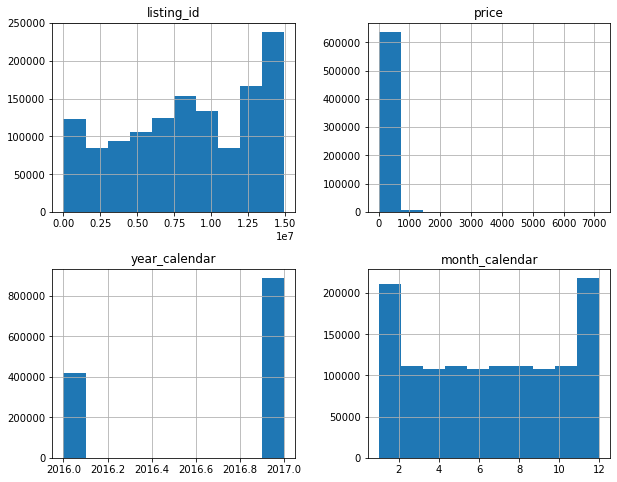

In [42]:
df_calendar.hist(figsize = (10,8))

- The dataset has data from the years 2016 and 2017;
- The months from January to February and November to December seems to be the busiest months of the year;
- Most of the airbsb cost less than 1 thousand dollars.

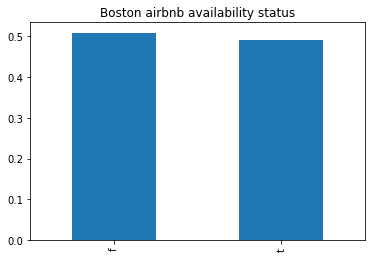

In [43]:
available_status = df_calendar.available.value_counts()
(available_status/df_calendar.shape[0]).plot(kind="bar");
plt.title("Boston airbnb availability status");

- The amount of available and rented airbnb is almos the same

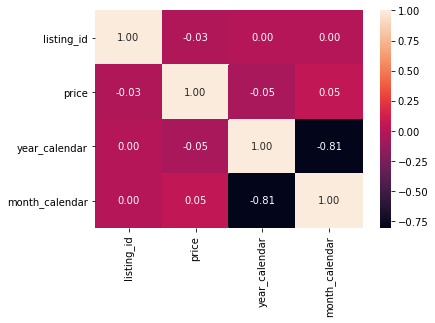

In [44]:
sns.heatmap(df_calendar.corr(), annot=True, fmt=".2f")

- Analyzing the correlation matriz, it is possible to observe that the month_calendar has the highest correlation with price when compared to other variables

### **Q2)** Which months have more rented airbnb? And the months that have less rented properties? <a class="anchor" id="q2"></a>

In [45]:
df_calendar_available = df_calendar[df_calendar["available"]=="t"]
df_calendar_rented = df_calendar[df_calendar["available"]=="f"]
print("df_calendar_available.shape)", df_calendar_available.shape)
print("df_calendar_rented.shape)", df_calendar_rented.shape)

df_calendar_available.shape) (643037, 5)
df_calendar_rented.shape) (665853, 5)


In [46]:
df_calendar.available.value_counts()

f    665853
t    643037
Name: available, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027F01B53FD0>,
      dtype=object)

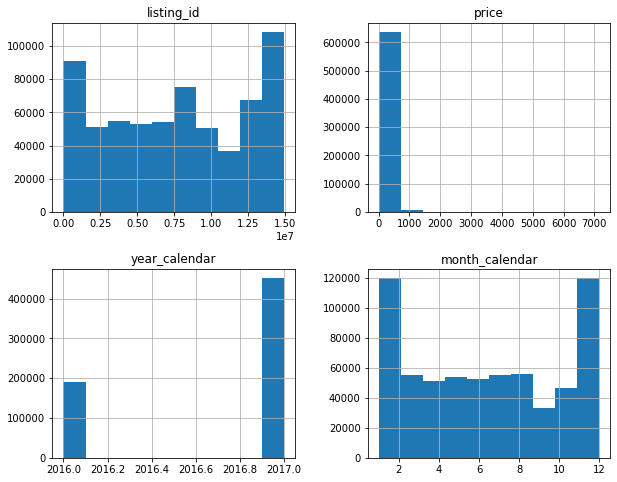

In [47]:
df_calendar_available.hist(figsize = (10,8))

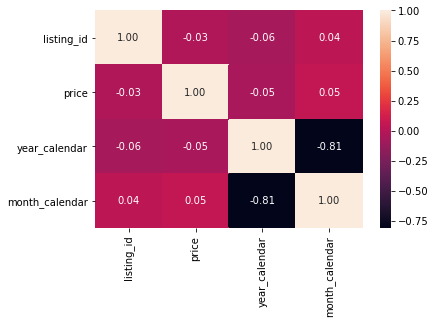

In [48]:
sns.heatmap(df_calendar_available.corr(), annot=True, fmt=".2f")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027F20DF4D90>,
      dtype=object)

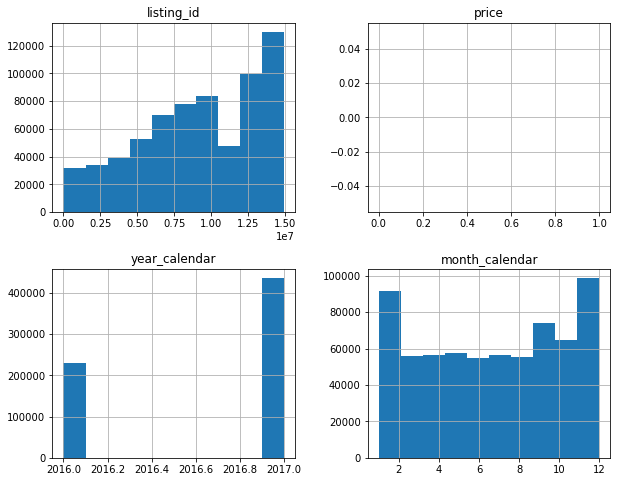

In [49]:
df_calendar_rented.hist(figsize = (10,8))

- There is new peak between Sep/Oct when evaluating the rented airbnb;
- The oposite happens for the same period in the histogram for available properties.

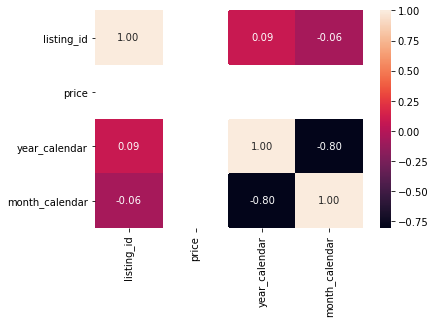

In [50]:
sns.heatmap(df_calendar_rented.corr(), annot=True, fmt=".2f")

### **Q1)** Is there a big difference of price between the available and rented airbnb? <a class="anchor" id="q1"></a>

In [51]:
df_calendar_rented.price.isnull().mean()

1.0

- There is no price information for the rented airbnb. Therefore, the rented airbnb can not be used for the price prediction.

### **Q3)** The price of the aribnb vary according to the month? <a class="anchor" id="q3"></a>

In [52]:
df_available_2016 = df_calendar_available[df_calendar_available.year_calendar==2016].groupby(["month_calendar"]).mean()
df_available_2016

,listing_id,price,year_calendar
month_calendar,,,
9,8.152477e+06,252.677308,2016.0
10,8.327808e+06,233.416248,2016.0
11,8.206746e+06,202.924416,2016.0
12,7.992614e+06,192.601915,2016.0


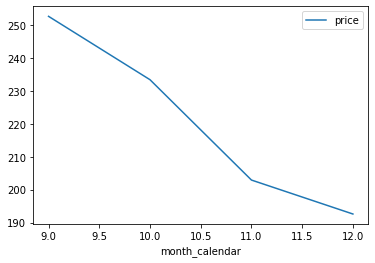

In [53]:
df_calendar_available[df_calendar_available.year_calendar==2016].groupby(["month_calendar"]).mean()["price"].plot(legend=True)

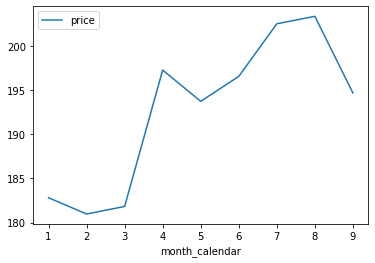

In [54]:
df_calendar_available[df_calendar_available.year_calendar==2017].groupby(["month_calendar"]).mean()["price"].plot(legend=True)

- The dataset is not complete for all months in 2016 and 2017 so it is hard to come to a precise conclusion;
- We can observe there is an increase in the prices in April and after May it keeps increasing until August, however this data is not enough to predict if the same will happen in the next years.

## 4) Model

- In the step 1 (read the dataset) we saw that when the dataframes df_listings and df_calendar are merged, the price information does not match so we decided to use price_y from df_calendar and dro price_x

In [55]:
#Merging columns after analyzing and treating df_listings and df_calendar separately 
print("df_listings.shape = ",df_listings.shape)
print("df_calendar.shape = ",df_calendar.shape)
df_join = pd.merge(df_listings, df_calendar, left_on="id", right_on = "listing_id") 
print("df_join.shape = ",df_join.shape)

df_listings.shape =  (3585, 28)
df_calendar.shape =  (1308890, 5)
df_join.shape =  (1308890, 33)


In [56]:
df_join.dropna(subset=["price_y"], axis=0, inplace=True)
df_join[["price_x", "price_y"]]

,price_x,price_y
365,65.0,65.0
366,65.0,65.0
367,65.0,65.0
368,65.0,75.0
369,65.0,75.0
...,...,...
1308875,65.0,62.0
1308876,65.0,62.0
1308877,65.0,62.0
1308878,65.0,62.0


In [57]:
df_join.columns

Index(['id', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'neighbourhood',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price_x',
       'security_deposit', 'cleaning_fee', 'minimum_nights', 'maximum_nights',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'listing_id', 'available', 'price_y', 'year_calendar',
       'month_calendar'],
      dtype='object')

In [58]:
df_join.drop(["price_x", "id"], axis='columns',inplace=True)

### Q4) Which factors impact in the airbnb prices?  <a class="anchor" id="q4"></a>

In [59]:
df_join["price_y"].isnull().mean()

0.0

In [60]:
def clean_data(df):
    
    '''
    INPUT: Dataframe df
    OUTPUT: Feature dataframe X and the target variable (Airbnb price) y
    
    DESCRIPTION: This funtion receives a full dataframe and treat its data to separate it into features
    for the model and the target value. For this poupose, the function:
        1. Drop rows with missing price values
        2. Fill numeric columns with the mean
        3. Dummy the categorical variables
        4. Separate df into X and y
    '''
    
    #Drop rows with missing price values
    #In this case there is no missing values for the column "price_y" and the cell above shows.
    #However if there were missing values it would be necessary to handle them droping of doing data inputation.
    #df = df.dropna(subset=["price_y"], axis=0)
    y = df["price_y"]
    
    #Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=["float", "int"]).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
    
    #Dummy the categorical variables
    cat_vars = df.select_dtypes(include=["object"]).columns
    for var in cat_vars:
        #for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep="_", drop_first=True)], axis=1)
    X = df.drop(["price_y"], axis='columns')
    return X, y

In [61]:
#Use the function to create X and y
X, y = clean_data(df_join)

In [62]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=42)

#Instantiate model
lm_model = LinearRegression(normalize=True)

#Fit
lm_model.fit(X_train, y_train)

#Predict and score the model
y_test_preds = lm_model.predict(X_test)
rsquared_score = r2_score(y_test, y_test_preds)

#Rsquared and y_test
length_y_test = len(y_test_preds)
print("The r-squared score for your model was {} on {} values.".format(rsquared_score, length_y_test))

The r-squared score for your model was 0.4291823074228327 on 192912 values.


In [63]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

In [64]:
#To check which features matter in the model, check the weight of the coeficients
#Because the features are normalized we can look at how large the coeficient is
coef_df = coef_weights(lm_model.coef_, X_train)
coef_df.head(20)

,est_int,coefs,abs_coefs
56,property_type_Camper/RV,-186.318357,186.318357
36,neighbourhood_Financial District,162.728770,162.728770
33,neighbourhood_Downtown Crossing,130.479318,130.479318
35,neighbourhood_Fenway/Kenmore,115.853991,115.853991
30,neighbourhood_Chinatown,98.905960,98.905960
20,host_response_time_within a day,-92.959888,92.959888
24,neighbourhood_Back Bay,79.817465,79.817465
67,room_type_Shared room,-78.826737,78.826737
41,neighbourhood_Leather District,76.715535,76.715535
66,room_type_Private room,-74.362408,74.362408


- We can observe that the neighborhood, the property type, and the room type impact the most in pricing;
- For example, if a person chooses a camping accomodation of a shared room, they tend to pay less, what makes sense.